# Assignment 7


Assignment on Classification technique 
Every year many students give the GRE exam to get admission in foreign Universities. The 
data set contains GRE Scores (out of 340), TOEFL Scores (out of 120), University Rating 
(out of 5), Statement of Purpose strength (out of 5), Letter of Recommendation strength (out 
of 5), Undergraduate GPA (out of 10), Research Experience (0=no, 1=yes), Admitted (0=no, 
1=yes). Admitted is the target variable.  
Data Set: https://www.kaggle.com/mohansacharya/graduate-admissions 
The counselor of the firm is supposed check whether the student will get an admission or not 
based on his/her GRE score and Academic Score. So to help the counselor to take appropriate 
decisions build a machine learning model classifier using Decision tree to predict whether a 
student will get admission or not. 
a) Apply Data pre-processing (Label Encoding, Data Transformation….) techniques if 
necessary.  
b) Perform data-preparation (Train-Test Split) 
c) Apply Machine Learning Algorithm 
d) Evaluate Model


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [2]:
df = pd.read_csv(r"C:\Users\shubh\Downloads\Classroom\SY\SEM IV\Machine Learning\Lab\Datasets\Dataset_Admission_Predict - Dataset_Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
df.shape

(400, 9)

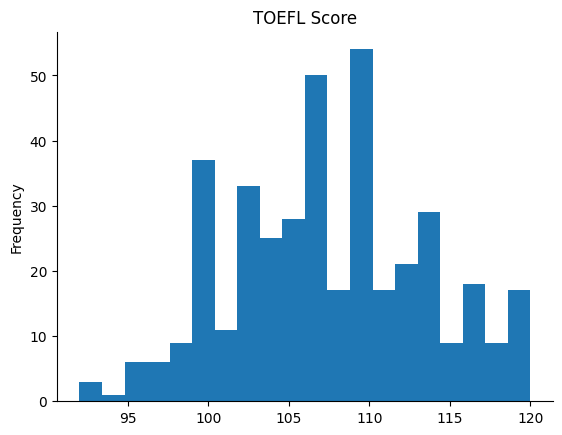

In [7]:
from matplotlib import pyplot as plt
df['TOEFL Score'].plot(kind='hist', bins=20, title='TOEFL Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

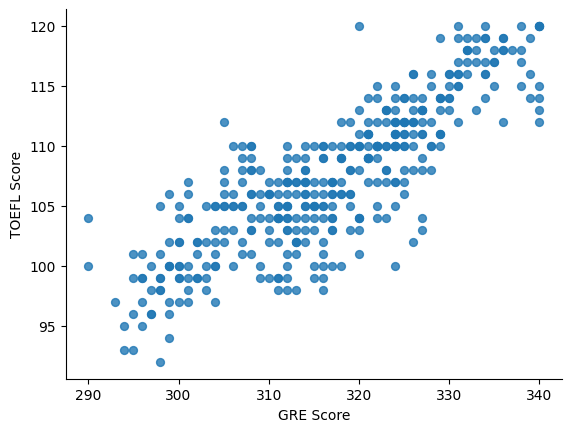

In [8]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='GRE Score', y='TOEFL Score', s=32, alpha=0.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
df['Research'].value_counts()

Research
1    219
0    181
Name: count, dtype: int64

In [10]:
for column in df.columns :
    print(column, df[column].nunique())

Serial No. 400
GRE Score 49
TOEFL Score 29
University Rating 5
SOP 9
LOR 9
CGPA 168
Research 2
Chance of Admit 60


In [11]:
# for column in df.columns:
#     print(f"Feature: {column}\n{df[column].value_counts()}\n")

In [12]:
df['Admitted'] = (df['Chance of Admit'] >= 0.75).astype(int)

X = df.drop(columns=['Serial No.', 'Chance of Admit', 'Admitted'])
y = df['Admitted']

print(X.shape)
print(y.shape)

(400, 7)
(400,)


In [13]:
# # df['Admitted'] = (df['Chance of Admit'] >= 0.5).astype(int)  # Convert to 0 or 1
# df.loc[df['Chance of Admit'] < 0.75, 'Chance of Admit'] = 0
# df.loc[df['Chance of Admit'] >= 0.75, 'Chance of Admit'] = 1

# X = df.drop(columns=['Serial No.', 'Chance of Admit', ])  
# y = df['Chance of Admit']

# print(X.shape)
# print(y.shape)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 7)
(80, 7)
(320,)
(80,)


In [15]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score

In [17]:
accuracy_score(y_test, y_pred)

0.875

In [18]:
confusion_matrix(y_test, y_pred)

array([[38,  9],
       [ 1, 32]], dtype=int64)

In [19]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.97      0.81      0.88        47\n           1       0.78      0.97      0.86        33\n\n    accuracy                           0.88        80\n   macro avg       0.88      0.89      0.87        80\nweighted avg       0.89      0.88      0.88        80\n'

In [20]:
print("1. Accuracy Score:", accuracy_score(y_test, y_pred))
print("2. Precision Score:",precision_score(y_test, y_pred))
print("3. Recall Score:", recall_score(y_test, y_pred))
print("4. f1 Score:", f1_score(y_test, y_pred))

1. Accuracy Score: 0.875
2. Precision Score: 0.7804878048780488
3. Recall Score: 0.9696969696969697
4. f1 Score: 0.8648648648648649


In [21]:
clf.score(X_test, y_test)

0.875

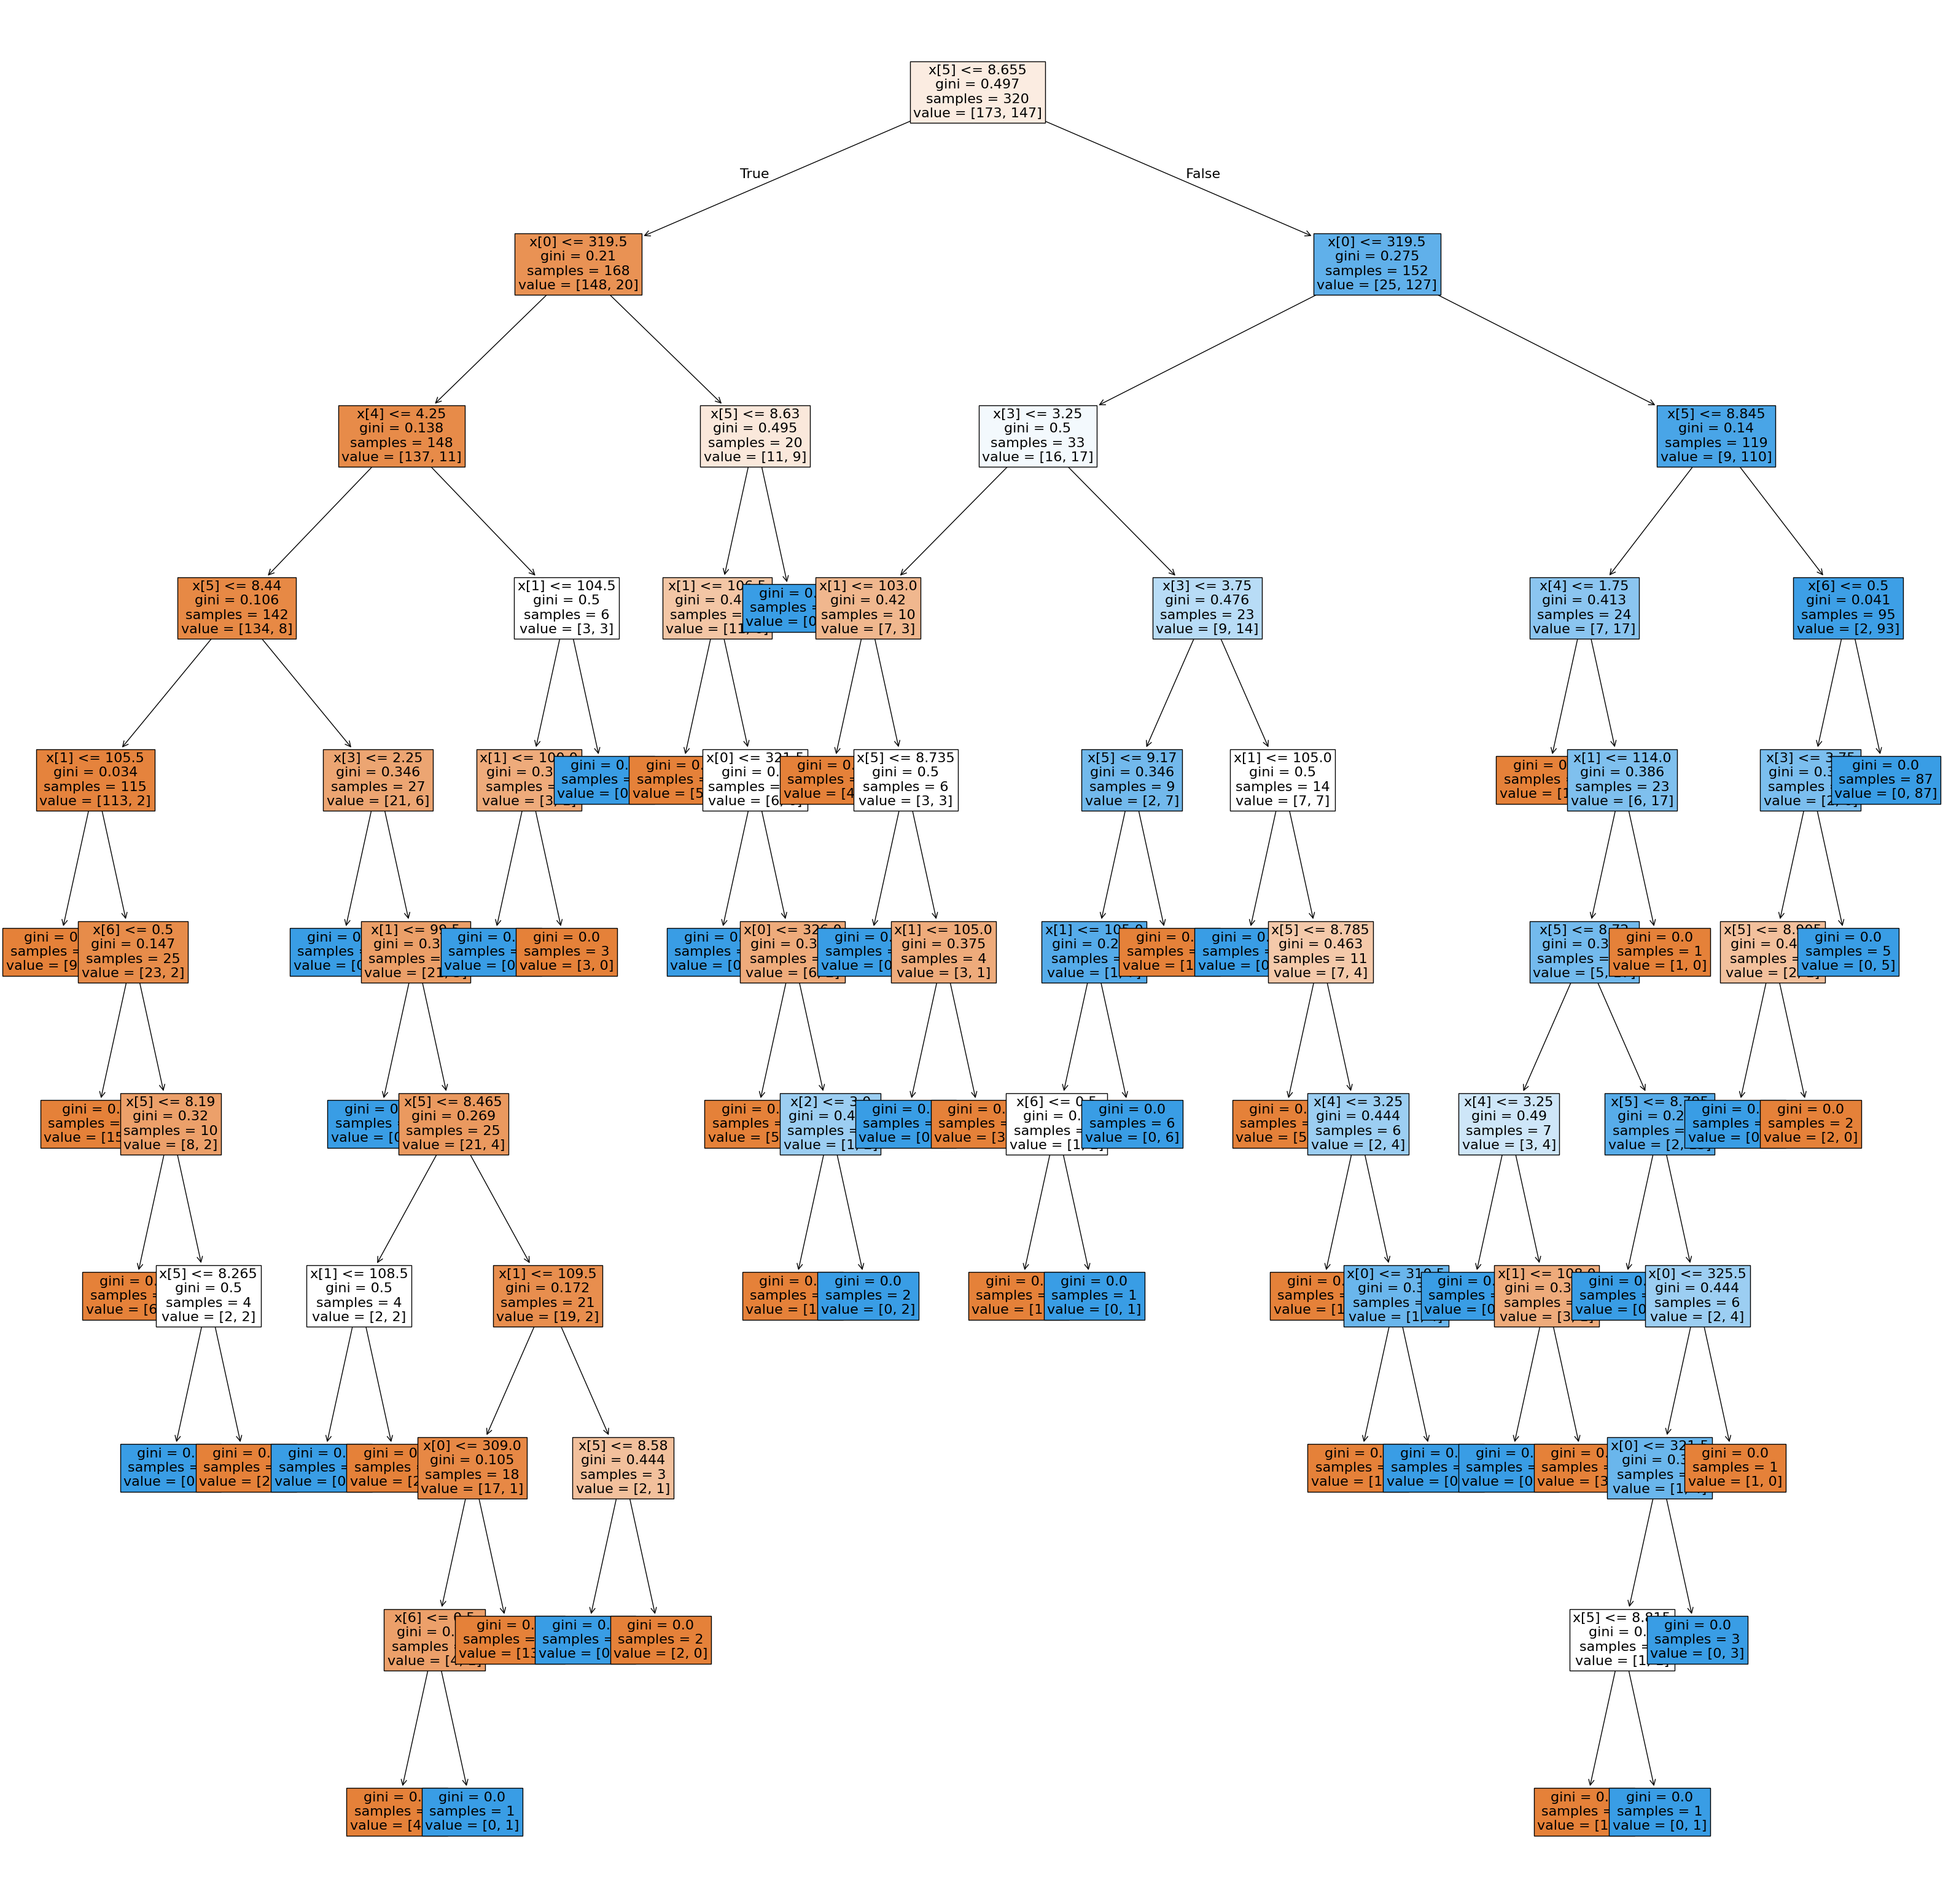

In [22]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 40))
tree.plot_tree(clf, filled=True, fontsize=16)
plt.show()

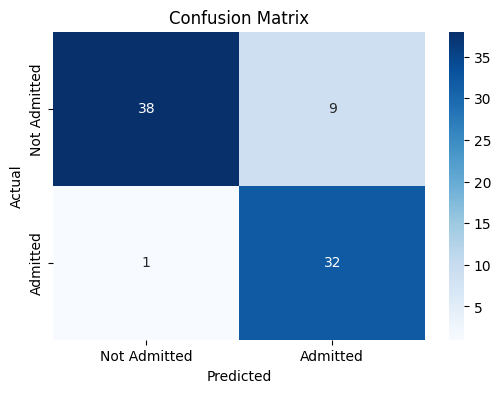

In [23]:
import seaborn as sns

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Admitted", "Admitted"], yticklabels=["Not Admitted", "Admitted"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


C:\Users\shubh\AppData\Local\Temp\ipykernel_20756\4012642402.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='viridis')


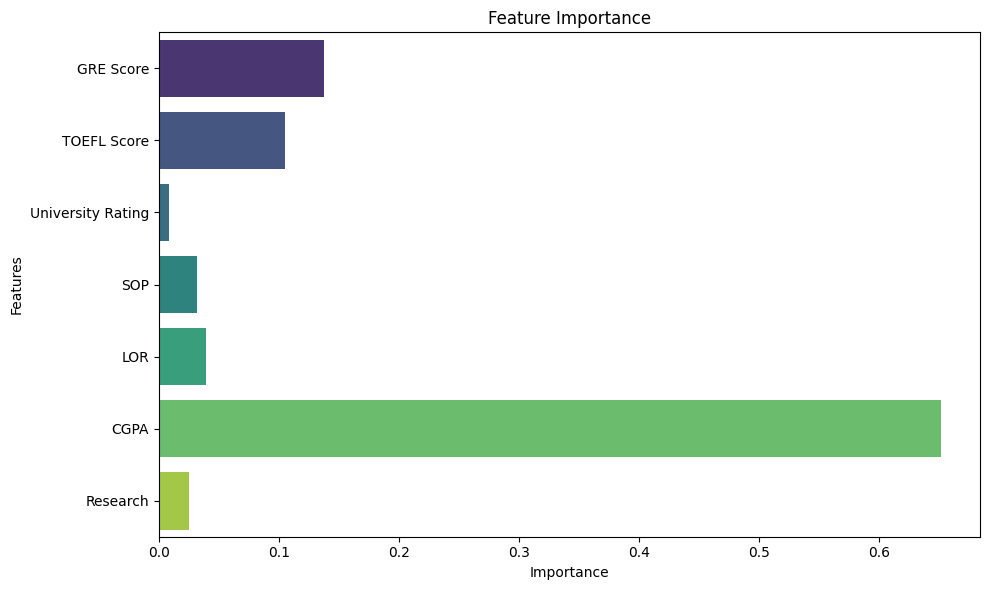

In [24]:
# Feature Importances
importances = clf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()
